Q.1

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [79]:
img = Image.open('/content/ngc1275_heic0817a.jpg')
img = img.convert('L')
img = np.asarray(img)

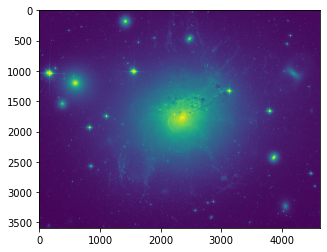

In [75]:
plt.imshow(img)

1. Linear operations

In [80]:
def linearoperation(img,P,L):
  img1 = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      # for k in range(img.shape[2]):
        img1[i][j] = int(P*int(img[i][j]) + L)
        if img1[i][j]>255:
          img1[i][j] = 255
        elif img1[i][j]<0:
          img1[i][j] = 0
  return np.asarray(img1,dtype='int')



In [85]:
def hist(img):
  arr = np.zeros(256)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        arr[img[i][j]]+=1
  return arr

In [159]:
#J = P*I
img1 = linearoperation(img,2,0)

In [160]:
#J = I + L
img2 = linearoperation(img,1,10)

In [161]:
#J = P*I + L
img3 = linearoperation(img,0.5,5)


In [86]:
img_arr = hist(img)
img1_arr = hist(img1)
img2_arr = hist(img2)
img3_arr = hist(img3)


In [87]:
#Hj[k] = Hi[k/P] for J = P*I
print(img1_arr[10] == img_arr[5])

True


In [88]:
#Hj[k] = Hi[k-L] for J = I + L
print(img2_arr[20] == img_arr[10])

True


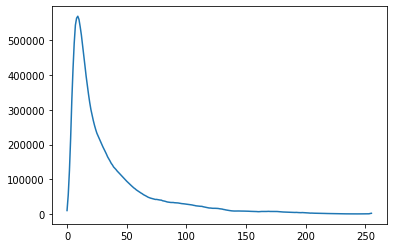

In [89]:
#Histogram of original image
plt.plot(img_arr)

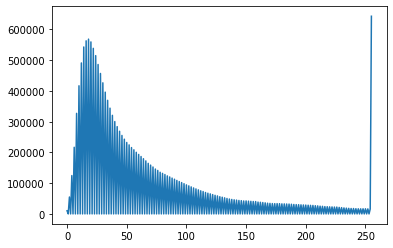

In [90]:
#Hist of  J = P*I
plt.plot(img1_arr)

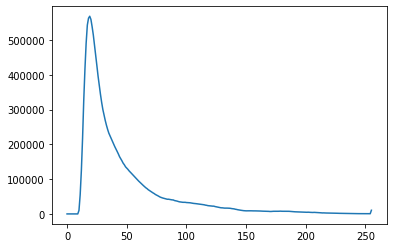

In [91]:
#J = I + L
plt.plot(img2_arr)


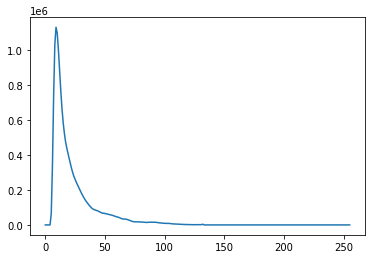

In [92]:
#J = P*I + L
plt.plot(img3_arr)

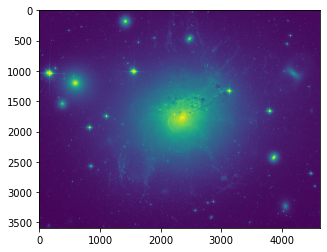

In [93]:
#Original image
plt.imshow(img)

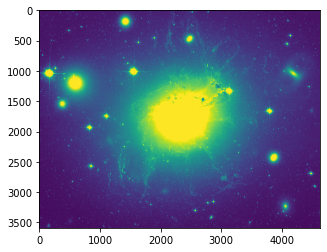

In [94]:
#J = P*I  
plt.imshow(img1)

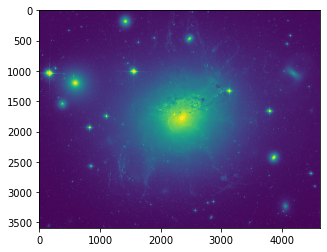

In [163]:
#J = I + L
plt.imshow(img2)

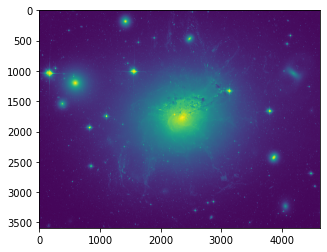

In [162]:
#J = P*I + L
plt.imshow(img3)

2. FSCS

In [95]:
#FSCS
def FSCS(img):
  min_pixel = img.min()
  max_pixel = img.max()
  P = 255/(max_pixel - min_pixel)
  L = -1*min_pixel*(P)
  img1 = linearoperation(img,P,L)
  return img1

In [96]:
img_FSCS = FSCS(img)

In [97]:
#Before FSCS
print('Minimum pixel intensity: {}'.format(img.min()))
print("Maximum pixel intensity: {}".format(img.max()))

Minimum pixel intensity: 0
Maximum pixel intensity: 255


In [98]:
#After FSCS
print('Minimum pixel intensity: {}'.format(img_FSCS.min()))
print("Maximum pixel intensity: {}".format(img_FSCS.max()))

Minimum pixel intensity: 0
Maximum pixel intensity: 255


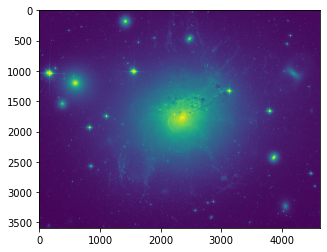

In [157]:
plt.imshow(img_FSCS)

In [99]:
img_FSCS_arr = hist(img_FSCS)

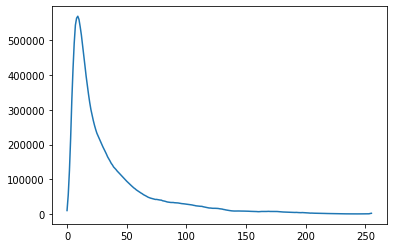

In [100]:
#Original image
plt.plot(img_arr)

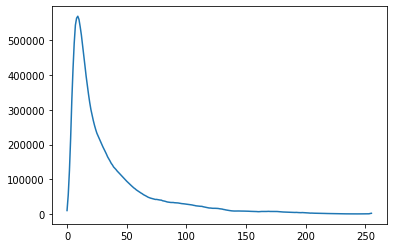

In [101]:
#After FSCS
plt.plot(img_FSCS_arr)

3. Log Compression - Smaller pixel values are enhanced. Image shows more details.

In [102]:
#LOG Compression
def logcompress(img):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
    #  for k in range(img.shap[2]):
        img1[i][j] = np.log(1 + img[i][j])
  return FSCS(img1)

In [103]:
img1_log = logcompress(img)

In [104]:
img1_log_arr = hist(img1_log)

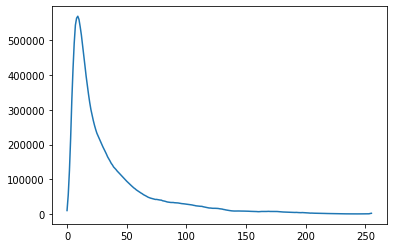

In [105]:
plt.plot(img_arr)

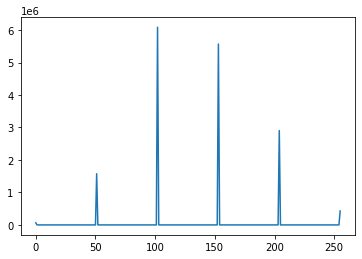

In [106]:
plt.plot(img1_log_arr)

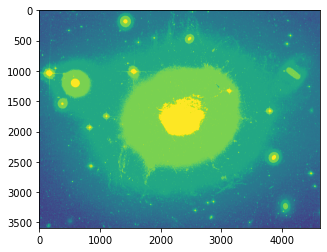

In [107]:
plt.imshow(img1_log)

4. Gamma Correction - Looks like it increases the intensity of the shadows. 

In [110]:
#Gamma Correction
def gamma(img,gamma):
  img1 = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      # for k in range(img.shape[2]):
        img1[i][j] = img[i][j]**gamma
        if img1[i][j] > 255:
          img1[i][j] = 255
  return np.asarray(img1,dtype='int')

In [111]:
img_gamma = gamma(img,1.4)

In [112]:
img_gamma_arr = hist(img_gamma)

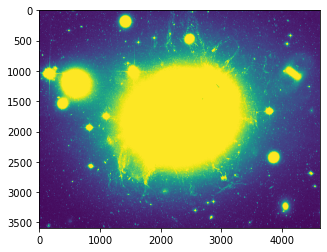

In [156]:
plt.imshow(img_gamma)

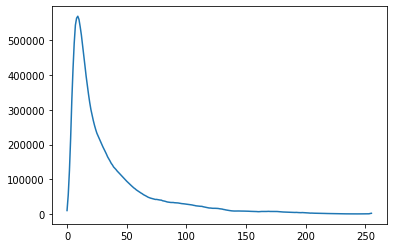

In [113]:
plt.plot(img_arr)

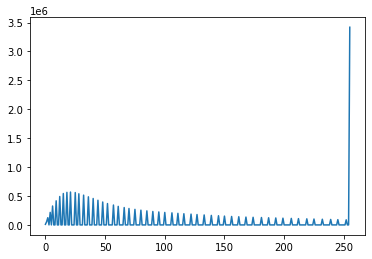

In [114]:
plt.plot(img_gamma_arr)

5. Histogram flattening- Shows more detail. Looks better than gamma correction and log compression

In [165]:
def histflatten(img):
  img_arr = hist(img)
  prob_arr = img_arr/(img.shape[0]*img.shape[1])
  cdf_arr = np.zeros(256)
  img_arr2 = np.zeros(img.shape,dtype='int')
  for i in range(256):
    cdf_arr[i] = sum(prob_arr[0:i])
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img_arr2[i,j] = int(np.round(255*cdf_arr[img[i,j]]))
  return hist((img_arr2)),img_arr2

  

In [136]:
int(np.round(255*0.9))

230

In [166]:
cdf_arr,img_arr2 = histflatten(img)

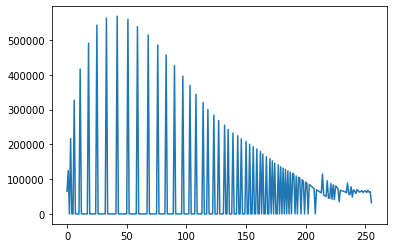

In [167]:
plt.plot(cdf_arr)

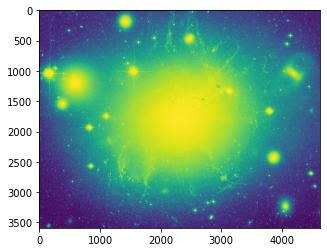

In [168]:
plt.imshow(img_arr2)

In [140]:
import cv2
import math

In [143]:
img2 = Image.open('/content/M94_Hubble_960.jpg')
img3 = Image.open('/content/Crab_HubbleChandraSpitzer_1080.jpg')
img2 = img2.convert('L')
img2 = np.asarray(img2)
img3 = img3.convert('L')
img3 = np.asarray(img3)

In [144]:
new_image = np.zeros([int(np.round(img.shape[0]*1.5)),int(np.round(img.shape[1]*1.5))])
new_image2 = np.zeros([int(np.round(img2.shape[0]*1.5)),int(np.round(img2.shape[1]*1.5))])
new_image3 = np.zeros([int(np.round(img3.shape[0]*1.5)),int(np.round(img3.shape[1]*1.5))])

In [147]:
#Image Zooming

def imagezooming(img,zoom,zoom_type='nn'):
  new_image = np.zeros([int(np.round(img.shape[0]*zoom)),int(np.round(img.shape[1]*zoom))])
  if zoom_type == 'nn':
    for i in range(new_image.shape[0]):
      for j in range(new_image.shape[1]):
        x_near = int(np.floor(i/zoom))
        y_near = int(np.floor(j/zoom))
        new_image[i,j] = img[x_near,y_near]
    return new_image

  elif zoom_type == 'bi':
    for i in range(new_image.shape[0]):
      for j in range(new_image.shape[1]):
        x_cor = i/zoom
        y_cor = j/zoom
        x1 = min(int(np.floor(x_cor)),img.shape[0]-1)
        x2 = min(int(np.ceil(x_cor)),img.shape[0]-1)
        y1 = min(int(np.floor(y_cor)),img.shape[1]-1)
        y2 = min(int(np.ceil(y_cor)),img.shape[1]-1)

        q11 = img[x1,y1]
        q12 = img[x1,y2]
        q21 = img[x2,y1]
        q22 = img[x2,y2]

        p1 = (x2-x_cor)*q11 + (x_cor - x1)*q12
        p2 = (x2-x_cor)*q21 + (x_cor - x1)*q22

        p = (y2 - y_cor)*p1 + (y_cor-y1)*p2

        new_image[i,j] = int(np.round(p))
    return new_image




In [149]:
a = time.time()
zoom_image = imagezooming(img,1.5,zoom_type='nn')
print(time.time() - a)

145.69013571739197


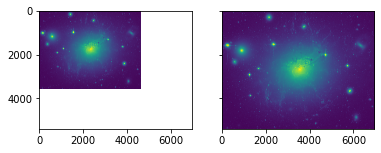

In [150]:
fix,ax = plt.subplots(1,2,sharex=True,sharey=True)
ax[0].imshow(img)
ax[1].imshow(zoom_image)

In [152]:
a = time.time()
zoom_image = imagezooming(img,1.5,zoom_type='bi')
print(time.time()-a)

896.8994269371033


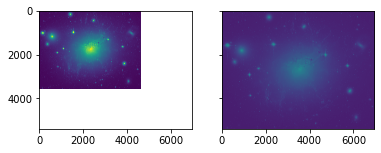

In [153]:
fix,ax = plt.subplots(1,2,sharex=True,sharey=True)
ax[0].imshow(img)
ax[1].imshow(zoom_image)

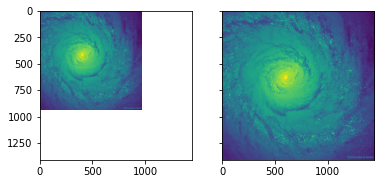

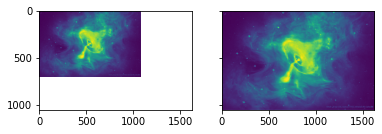

In [154]:
zoom_image2 = imagezooming(img2,1.5,zoom_type='nn')
zoom_image3 = imagezooming(img3,1.5,zoom_type='nn')
fig,ax = plt.subplots(1,2,sharex=True,sharey=True)
ax[0].imshow(img2)
ax[1].imshow(zoom_image2)
fig.show()
fig1,ax1 = plt.subplots(1,2,sharex=True,sharey=True)
ax1[0].imshow(img3)
ax1[1].imshow(zoom_image3)
fig1.show()

In [ ]:
zoom_image2 = imagezooming(img2,1.5,zoom_type='bi')
zoom_image3 = imagezooming(img3,1.5,zoom_type='bi')
fig,ax = plt.subplots(1,2,sharex=True,sharey=True)
ax[0].imshow(img2)
ax[1].imshow(zoom_image2)
fig.show()
fig1,ax1 = plt.subplots(1,2,sharex=True,sharey=True)
ax1[0].imshow(img3)
ax1[1].imshow(zoom_image3)
fig1.show()

Bilinear interpolation takes a lot longer than nearest neighbors, but nearest neighbor looks better.

3. DFT

In [7]:
#DFT

img = image.imread("/content/5.1.09.tiff")


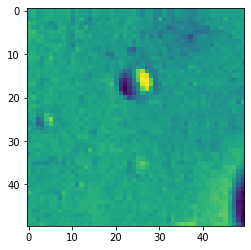

In [9]:
plt.imshow(img[:50,:50])

In [8]:
def DFT(img):
  dft_arr = np.zeros(img.shape,dtype='complex')
  M,N = img.shape

  for i in range(M):
    for j in range(N):
      sum_value = 0
      for k in range(M):
        for l in range(N):
          e = np.exp(-(2j*np.pi*((k/M)*i + (l/N)*j)))
          sum_value += e*img[k,l]
      dft_arr[i,j] = sum_value
  return dft_arr

def centered_DFT(img):
  dft_arr = np.zeros(img.shape,dtype='complex')
  M,N = img.shape

  for i in range(M):
    for j in range(N):
      sum_value = 0
      for k in range(M):
        for l in range(N):
          e = np.exp(-(2j*np.pi*((k/M)*(i-M/2) + (l/N)*(j-N/2))))
          sum_value += e*img[k,l]
      dft_arr[i,j] = sum_value
  return dft_arr



In [57]:
dft_img = DFT(img[:50,:50])
dft_center = centered_DFT(img[:50,:50])


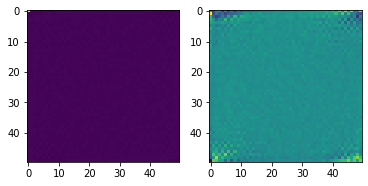

In [13]:
#DFT
fig,ax = plt.subplots(1,2)
ax[0].imshow(np.real(dft_img))
ax[1].imshow(np.imag(dft_img))

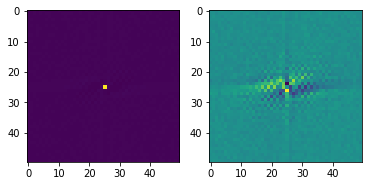

In [11]:
#CENTERED DFT
fig,ax = plt.subplots(1,2)
ax[0].imshow(np.real(dft_center))
ax[1].imshow(np.imag(dft_center))

Magnitude and phase spectrum

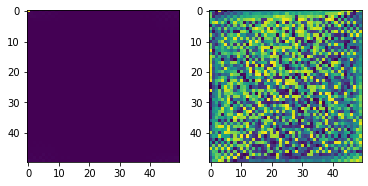

In [63]:
def mag_dft(img):
  mag = np.sqrt(np.real(img)**2 + np.imag(img)**2)
  return mag
def log_mag(img):
  log_mag = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      log_mag[i,j] = np.log(1 + img[i,j])
  return log_mag 

def phase_dft(img):
  return np.angle(img)



mag_arr = mag_dft(dft_img)
log_mag_arr = log_mag(mag_arr)
phase_arr = phase_dft(dft_img)
fig,ax = plt.subplots(1,2)
ax[0].imshow(mag_arr)
ax[1].imshow(phase_arr)



IDFT

<ipython-input-16-9cd3c21f3a35>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  idft[i,j] = sum_value/M*N


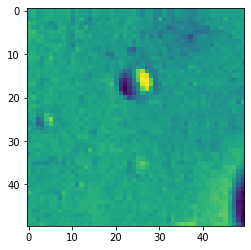

In [16]:
def IDFT(img):
  idft = np.zeros(img.shape)
  M,N = img.shape
  for i in range(M):
    for j in range(N):
      sum_value = 0
      for k in range(M):
        for l in range(N):
          e = np.exp((2j*np.pi*((k/M)*i + (l/N)*j)))
          sum_value += e*img[k,l]
      idft[i,j] = sum_value/M*N
  return idft

idft_arr = IDFT(dft_img) 
plt.imshow(idft_arr)



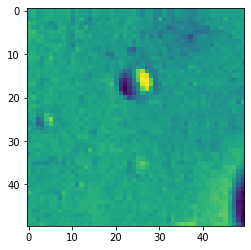

In [17]:
plt.imshow(img[:50,:50])

DFT Using exponential matrix

In [26]:
def DFT_exp(img):
  # dft_arr = np.zeros(img.shape,dtype='complex')
  M,N = img.shape
  exp_matrix = np.zeros(img.shape,dtype='complex')
  for i in range(M):
    for j in range(N):
      exp_matrix[i,j] = np.exp(-2j*np.pi*i*j/N)
  dft_arr = np.matmul(np.matmul(exp_matrix,img),exp_matrix)
  return dft_arr

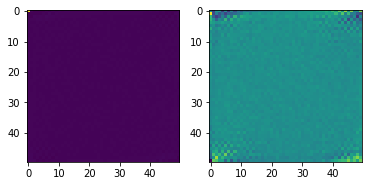

In [27]:
dft_arr2 = DFT_exp(img[:50,:50])
fig,ax = plt.subplots(1,2)
ax[0].imshow(np.real(dft_arr2))
ax[1].imshow(np.imag(dft_arr2))

<ipython-input-16-9cd3c21f3a35>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  idft[i,j] = sum_value/M*N


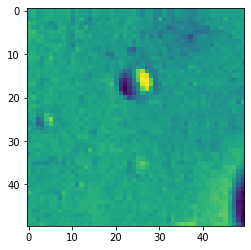

In [44]:
fft = np.fft.fft2(img[:50,:50])
magnitude = np.abs(fft)
phase = np.angle(fft)
dft_recon = reconstruct(magnitude,phase)
img_recon = IDFT(dft_recon)
plt.imshow(img_recon)

Reconstructing image using IDFT

<ipython-input-16-9cd3c21f3a35>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  idft[i,j] = sum_value/M*N


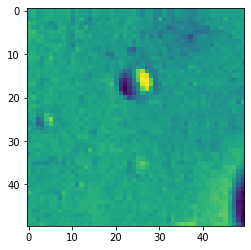

In [64]:
#4. 
def reconstruct(mag,phase):
  recon = np.zeros(mag.shape,dtype='complex')
  for i in range(mag.shape[0]):
    for j in range(mag.shape[1]):
      recon[i,j] = mag[i,j]*np.exp(1j*phase[i,j])
  return recon
dft_recon = reconstruct(mag_arr,phase_arr)
img_recon = IDFT(dft_recon)
# fig,ax = plt.subplots(1,2)
# ax[0].imshow(np.real(dft_recon))
# ax[1].imshow(np.imag(dft_recon))
plt.imshow(img_recon)

<ipython-input-16-9cd3c21f3a35>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  idft[i,j] = sum_value/M*N


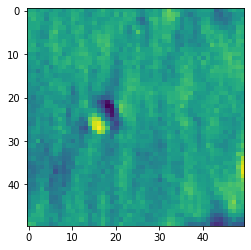

In [65]:
#PHASE TRANSPOSE
phase_arr2 = phase_arr.T
dft_recon = reconstruct(mag_arr,phase_arr2)
img_recon = IDFT(dft_recon)
plt.imshow(img_recon)

<ipython-input-16-9cd3c21f3a35>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  idft[i,j] = sum_value/M*N


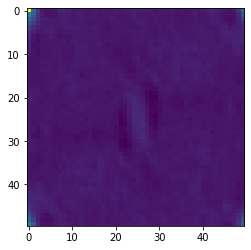

In [66]:
#ZERO PHASE
phase_arr3 = np.zeros(phase_arr.shape)
dft_recon = reconstruct(mag_arr,phase_arr3)
img_recon = IDFT(dft_recon)
plt.imshow(img_recon)

<ipython-input-16-9cd3c21f3a35>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  idft[i,j] = sum_value/M*N


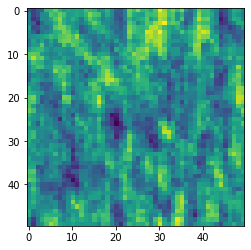

In [70]:
#ADDED NOISE
mean = 0
var = 10
gaussian = np.random.normal(mean,var,(phase_arr.shape))
phase_arr4 = phase_arr + gaussian
dft_recon = reconstruct(mag_arr,phase_arr4)
img_recon = IDFT(dft_recon)
plt.imshow(img_recon)